# 3 Arm Foraging maze

In [1]:
import os
import pickle

import numpy as np
import matplotlib.pyplot as plt

In [2]:
colors=('xkcd:water blue','xkcd:scarlet','xkcd:mango')#,'xkcd:grass green')

with open('dfSessList.pkl','rb') as fname:
    dfSessList=pickle.load(fname)
    
with open('dfVI.pkl','rb') as fname:
    dfVI=pickle.load(fname)
    
with open('dfLing.pkl','rb') as fname:
    dfLing=pickle.load(fname)
    
with open('dfTince.pkl','rb') as fname:
    dfTince=pickle.load(fname)
    
listSubj=np.array(list(set(dfVI.subj)))
listSubj.sort()


<img src="W71_0745.JPG" alt="3 Arm Foraging maze" title="3 Arm Foraging maze" />

<img src="W71_0731.JPG" alt="3 Arm Foraging maze - poke close-up" title="3 Arm Foraging maze - poke close-up" />

We trained rats on a number of related foraging tasks on the 3-arm maze depicted above. Arms are 20 inches long, 120º apart from each other, and each are equipped with floor lights and a nose-port at the end. Floor lights were used as cues, and nose-ports were used to register nose-poke responses and deliver water rewards according to different contingencies described below.

## 1. Dynamic Bandit
(concurrent variable interval schedules)

In this task variant the first response at each of the three arms was rewarded. After that, a new response at arm $k$ was rewarded as long as more than $X_k$ seconds had elapsed since last rewarded response at the same arm, where $X_k \sim Exp(\lambda_k)$. Values of $\lambda$ were set anew at the beginning of each session by sampling randomly without replacement from the set $\{30^{-1},60^{-1},120^{-1}\}$. Since $E[X_k]=\lambda_k^{-1}$, average intervals at arms $A=\{0,1,2\}$ were a random permutation of $I=\{30, 60, 120\}$ seconds. For a given arm $k$, a new $X_k$ was sampled after each reward event.

In other words, this is a probabilistic 3-armed bandit task where probability of reward grows monotonically with time since last response at the same arm. Specifically, responding at arm $k$ at time $t_k$ was rewarded with probability $F_{X_k}(t_k) = 1 - e^{-\lambda_k t_k}$ (i.e. the CDF of $Exp(\lambda_k)$ evaluated at $t_k$).

### Results

In [3]:
display(dfSessList[['subj','date','IRI','VI','cued','deplete','dur','meanA','meanB','meanC','rewSize']])

,subj,date,IRI,VI,cued,deplete,dur,meanA,meanB,meanC,rewSize
0,TG023,20180621,1,True,False,False,66,60,30,120,40
1,TG023,20180622,1,True,False,False,59,60,30,120,40
2,TG023,20180625,1,True,False,False,64,60,30,120,40
3,TG023,20180626,1,True,False,False,53,60,30,120,40
4,TG023,20180627,1,True,False,False,56,60,30,120,40
5,TG023,20180628,1,True,False,False,52,120,60,30,40
6,TG023,20180629,1,True,False,False,62,60,120,30,40
7,TG024,20180621,1,True,False,False,55,60,120,30,40
8,TG024,20180622,1,True,False,False,53,120,60,30,40
9,TG024,20180625,1,True,False,False,52,60,30,120,40


**Table 1.1** List of all sessions included in current analyses. n = 4 subjects, 7-8 sessions each. Session duration in minutes, mean interval for each arm in seconds, reward magnitude in microliters.

In [4]:
dfVI.sample(15).sort_index().iloc[:,[0,1,3,2,4]]

,subj,date,interval,armNo,armVal
ndx,,,,,
359,TG023,20180625,81.3961,2,2
924,TG023,20180628,237.2049,0,2
1154,TG024,20180621,113.5898,1,2
1289,TG024,20180622,53.3077,2,0
1569,TG024,20180626,2.1833,0,0
2566,TG025,20180622,6.2804,2,0
3235,TG025,20180628,77.5950,2,1
3854,TG026,20180622,162.8769,2,0
3891,TG026,20180622,90.5226,0,2


**Table 1.2** Sample data from table of intervals. *Interval* is time elapsed between a rewarded response and the time when another reward is made available at the same arm.  *armNo* identifies physical arm ($k$). *armVal* identifies ranked value of $\lambda_k$ assigned to arm $k$ on a given session.

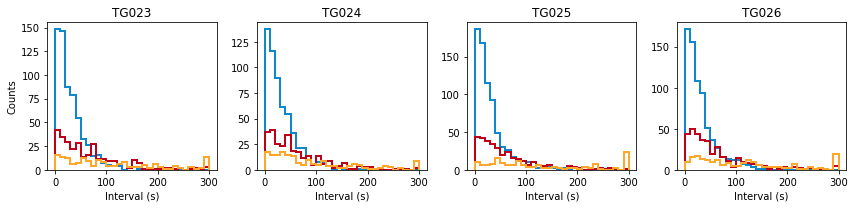

In [5]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(12,3))#,sharex=True,sharey=True)
ha[0].set_ylabel('Counts')
for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfVI_subj=dfVI[dfVI['subj']==nameSubj]
    
    listSess=np.array(list(set(dfVI_subj['date'])))
    listSess.sort()
    
    ha[iSubj].set_xlabel('Interval (s)')
    ha[iSubj].set_title(nameSubj)

    for iArm in set(dfVI_subj['armVal']):
        
        dfVI_arm=dfVI_subj[dfVI_subj['armVal']==iArm]
        x=dfVI_arm.interval
        x=x.clip(0,300)
        ha[iSubj].hist(x,bins=np.linspace(0,300,31),cumulative=False,density=False,histtype='step',color=colors[iArm],lw=2)
                
plt.tight_layout()

**Figure 1.1** Histograms of interval between rewarded response and next reward availability, pooled over sessions within arms of same $\lambda_k$. This is a sanity-check MC reconstruction of $Exp(\lambda_k)$.

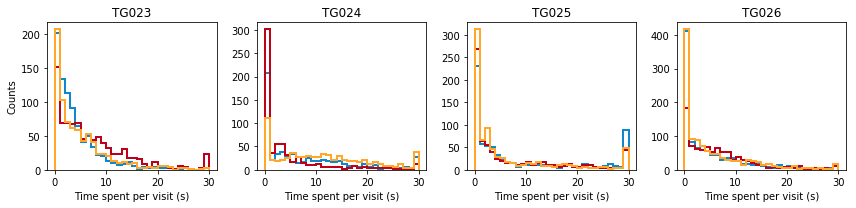

In [6]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(12,3))#,sharex=True,sharey=True)
ha[0].set_ylabel('Counts')
for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfLing_subj=dfLing[dfLing['subj']==nameSubj]
    
    listSess=np.array(list(set(dfLing_subj['date'])))
    listSess.sort()
    
    ha[iSubj].set_xlabel('Time spent per visit (s)')
    ha[iSubj].set_title(nameSubj)
    
    listArmVal=np.array(list(set(dfLing_subj['armVal'])))
    listArmVal.sort()

    for iArm in range(len(listArmVal)):
        
        dfLing_arm=dfLing_subj[dfLing_subj['armVal']==listArmVal[iArm]]
        x=dfLing_arm.lingert
        x=x.clip(0,30)
        ha[iSubj].hist(x,bins=np.linspace(0,30,31),cumulative=False,density=False,histtype='step',color=colors[iArm],lw=2)
                
plt.tight_layout()

**Figure 1.2** Histogram of time spent at an arm per visit (computed from time difference between first and last response, __[clipped](https://docs.scipy.org/doc/numpy/reference/generated/numpy.clip.html)__ at 30s for display purposes), pooled over sessions within arms of same $\lambda_k$.

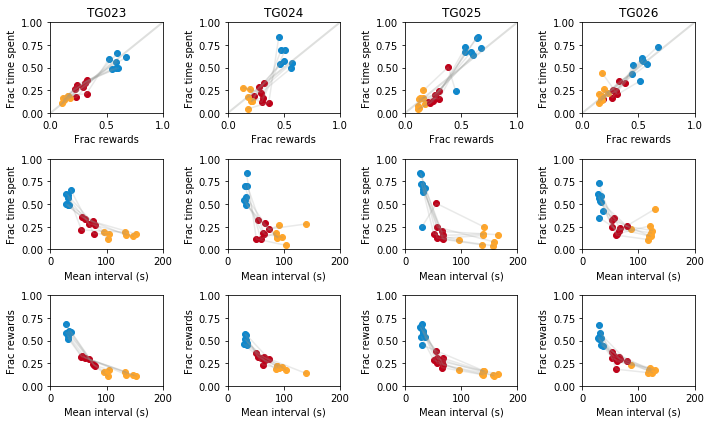

In [7]:
hf, ha = plt.subplots(3,len(listSubj),figsize=(10,6))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    
    dfVI_subj=dfVI[dfVI['subj']==nameSubj]
    dfLing_subj=dfLing[dfLing['subj']==nameSubj]
    
    listSess=np.array(list(set(dfVI_subj['date'])))
    listSess.sort()
    
    ha[0,iSubj].plot([0,1],[0,1],c='xkcd:gray',lw=2, alpha=.3)
    
#     print(nameSubj,listSess)
        
    for iSess in range(len(listSess)):
        dfVI_sess=dfVI_subj[dfVI_subj['date']==listSess[iSess]]
        dfLing_sess=dfLing_subj[dfLing_subj['date']==listSess[iSess]]
        
        mu=np.full(3,np.nan)
        sigma=np.full(3,np.nan)
        fracTime=np.full(3,np.nan)
        fracRew=np.full(3,np.nan)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            
            mu[iArm]=dfVI_arm['interval'].mean()
            sigma[iArm]=dfVI_arm['interval'].std()
            fracTime[iArm]=dfLing_arm['lingert'].sum()/dfLing_sess['lingert'].sum()
            fracRew[iArm]=dfLing_arm['nRew'].sum()/dfLing_sess['nRew'].sum()
        
        ha[0,iSubj].plot(np.sort(fracRew),fracTime[np.argsort(fracRew)],c='xkcd:gray',alpha=.2)
        ha[1,iSubj].plot(np.sort(mu),fracTime[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        ha[2,iSubj].plot(np.sort(mu),fracRew[np.argsort(mu)],c='xkcd:gray',alpha=.2)
        
        for iArm in set(dfVI_sess['armNo']):
            dfVI_arm=dfVI_sess[dfVI_sess['armNo']==iArm]
            dfLing_arm=dfLing_sess[dfLing_sess['armNo']==iArm]
            color=colors[np.arange(3)[mu[iArm]==sorted(mu)].item()]
        
            ha[0,iSubj].scatter(fracRew[iArm],fracTime[iArm],c=color)

            ha[1,iSubj].scatter(mu[iArm],fracTime[iArm],c=color)
            
            ha[2,iSubj].scatter(mu[iArm],fracRew[iArm],c=color)
            
    ha[0,iSubj].set_title(nameSubj)
    ha[0,iSubj].set_xlabel('Frac rewards')
    ha[0,iSubj].set_ylabel('Frac time spent')
    ha[0,iSubj].set_xlim(0,1)
    ha[0,iSubj].set_ylim(0,1)
    
    ha[1,iSubj].set_xlabel('Mean interval (s)')
    ha[1,iSubj].set_ylabel('Frac time spent')
    ha[1,iSubj].set_xlim(0,200)
    ha[1,iSubj].set_ylim(0,1)
    
    ha[2,iSubj].set_xlabel('Mean interval (s)')
    ha[2,iSubj].set_ylabel('Frac rewards')
    ha[2,iSubj].set_xlim(0,200)
    ha[2,iSubj].set_ylim(0,1)

plt.tight_layout()

**Figure 1.3** Each set of 3 linked points is one session.
(top) Fraction of total time spent in an arm (measured from time difference between first and last poke response) vs fraction of rewards obtained for each arm. Behavior generally adheres to Matching law.
(mid) Fraction of total time spent vs average interval --- i.e. empirical $E [X_k ] $ --- for each arm.
(bottom) Fraction of rewards vs average interval for each arm.

### To do

 - Test whether animals keep track of time-varying $P(reward)$ at other arms.

    - Null hypothesis: choices of when to leave an arm (time spent) and what arm to visit depend on arm value ($\lambda$), but not on time since last reward at each of three arms.
    - In other words, behavior is explained by random, independent samples from distributions represented in figures 1.1 and 1.2.
    
- Manipulate effort


In [8]:
dfTince.sample(5).sort_index().iloc[:,[0,1,2,3,4,8,5,6,7]]

,subj,date,arm,nextArm,nextRwded,travel,tinceR0,tinceR1,tinceR2
2653,TG024,20180621,2,0,True,4.4506,41.2953,90.5203,34.2939
3841,TG024,20180627,0,1,True,2.4919,115.5265,30.3478,5.4874
6955,TG026,20180620,0,2,False,2.2345,4.6231,174.4665,8.8622
8112,TG026,20180625,2,1,False,2.3552,57.1118,31.4593,127.8651
8541,TG026,20180626,1,0,False,2.1039,24.2116,16.2824,45.0672


**Table 1.3** Sample data from table of leaving decisions - ie last response of a sequence. After emitting a response at *arm*, animals moved on to *nextarm*, and travel time (s) is indicated in *travel*. Arms are identified by their values of $\lambda_k$ and not by their physical location, meaning nubmers are comparable across sessions. *tinceRk* is time elapsed since last reward at arm $k$ and the current response.

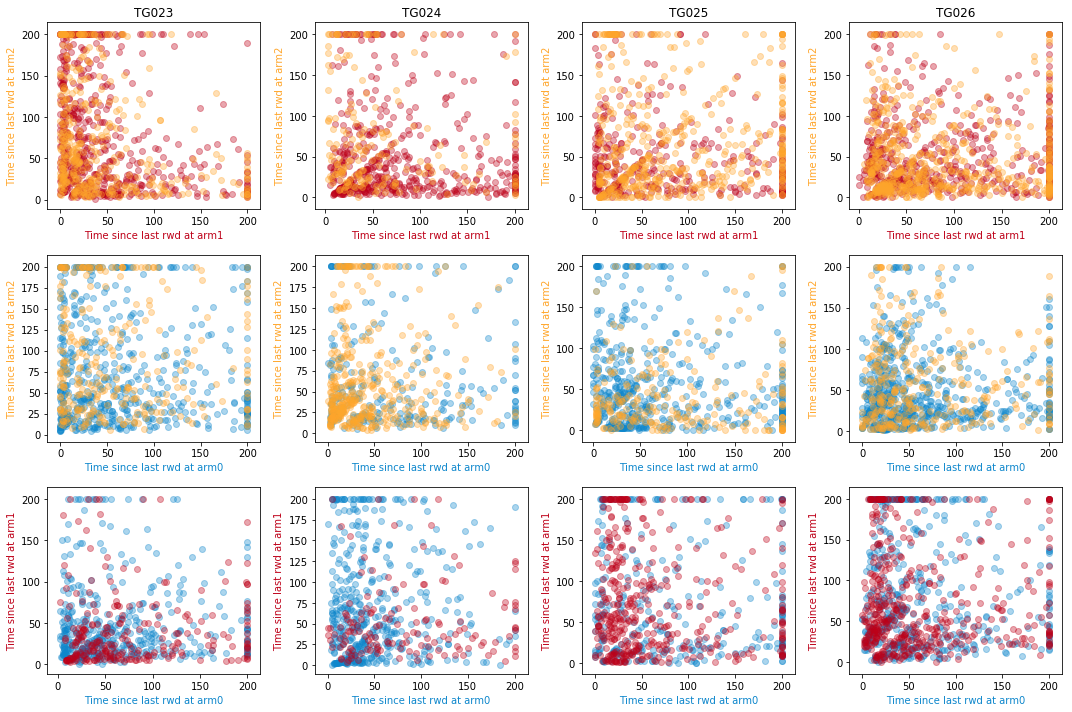

In [9]:
hf, ha = plt.subplots(3,len(listSubj),figsize=(15,10))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfTince.subj==nameSubj
    ha[0,iSubj].set_title(nameSubj)
    for iArm in list(set(dfTince[ndxSubj].arm)):
        ndxArm=np.logical_and(dfTince.arm==iArm,ndxSubj)
        listArmJ=list(set(dfTince[ndxArm].nextArm))
        for jArm in listArmJ:
            ndxArmJ=np.logical_and(dfTince.nextArm==jArm,ndxArm)
            x=dfTince[ndxArmJ]['tinceR'+str(listArmJ[0])]
            y=dfTince[ndxArmJ]['tinceR'+str(listArmJ[1])]
            
            x=np.clip(x,0,200)
            y=np.clip(y,0,200)
            
#             x=np.sqrt(x)
#             y=np.sqrt(y)
            
#             x=np.log(x)
#             y=np.log(y)
            
            ha[iArm,iSubj].scatter(x,y,c=colors[jArm],alpha=0.35)
            ha[iArm,iSubj].set_xlabel('Time since last rwd at arm' + str(listArmJ[0]))
            ha[iArm,iSubj].set_ylabel('Time since last rwd at arm' + str(listArmJ[1]))
            ha[iArm,iSubj].xaxis.label.set_color(colors[listArmJ[0]])
            ha[iArm,iSubj].yaxis.label.set_color(colors[listArmJ[1]])
            
plt.tight_layout()

**Figure 1.4** Abscissa and ordinate denote time (clipped at 200s) elapsed since last reward at distant arms at the moment of disengaging from current arm. Marker color indicates what arm was visited next.

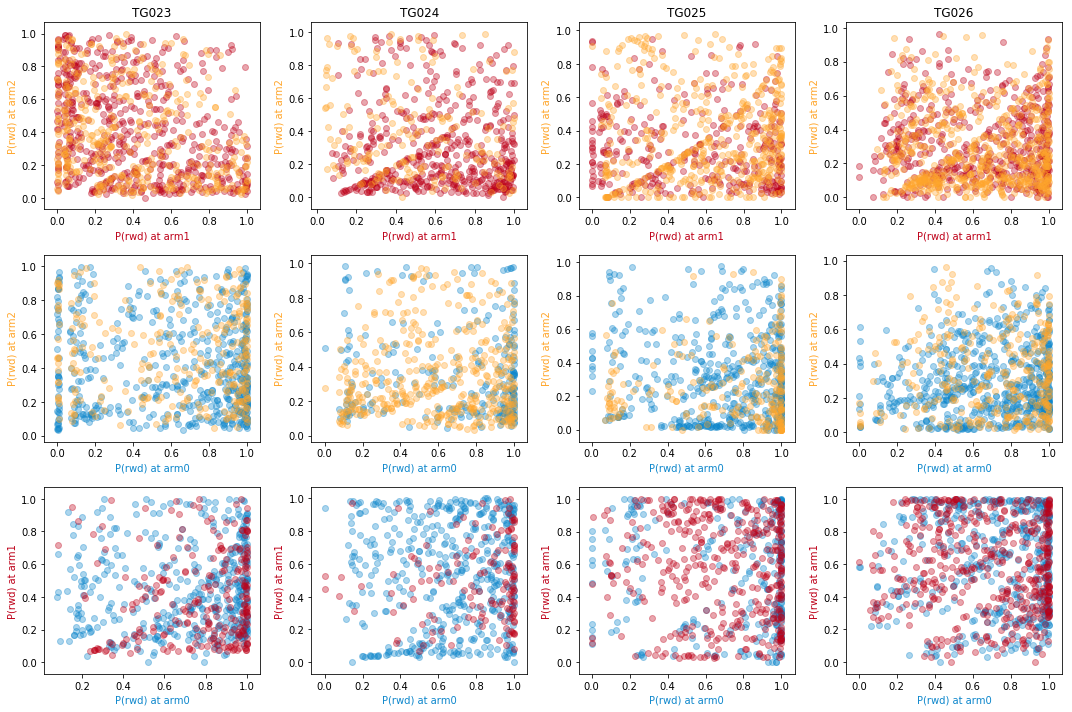

In [10]:
lambdas=[1./30,1./60,1./120]
hf, ha = plt.subplots(3,len(listSubj),figsize=(15,10))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfTince.subj==nameSubj
    ha[0,iSubj].set_title(nameSubj)
    for iArm in list(set(dfTince[ndxSubj].arm)):
        ndxArm=np.logical_and(dfTince.arm==iArm,ndxSubj)
        listArmJ=list(set(dfTince[ndxArm].nextArm))
        for jArm in listArmJ:
            ndxArmJ=np.logical_and(dfTince.nextArm==jArm,ndxArm)
            x=dfTince[ndxArmJ]['tinceR'+str(listArmJ[0])]
            y=dfTince[ndxArmJ]['tinceR'+str(listArmJ[1])]
            
#             x=np.clip(x,0,200)
#             y=np.clip(y,0,200)
            
#             x=np.sqrt(x)
#             y=np.sqrt(y)
            
#             x=np.log(x)
#             y=np.log(y)

            x=1-np.exp(-1*lambdas[listArmJ[0]]*x)
            y=1-np.exp(-1*lambdas[listArmJ[1]]*y)
            
            ha[iArm,iSubj].scatter(x,y,c=colors[jArm],alpha=0.35)
            ha[iArm,iSubj].set_xlabel('P(rwd) at arm' + str(listArmJ[0]))
            ha[iArm,iSubj].set_ylabel('P(rwd) at arm' + str(listArmJ[1]))
            ha[iArm,iSubj].xaxis.label.set_color(colors[listArmJ[0]])
            ha[iArm,iSubj].yaxis.label.set_color(colors[listArmJ[1]])
            
plt.tight_layout()

**Figure 1.5** Abscissa and ordinate denote probability of reward at distant arms at the moment of disengaging from current arm. Marker color indicates what arm was visited next.

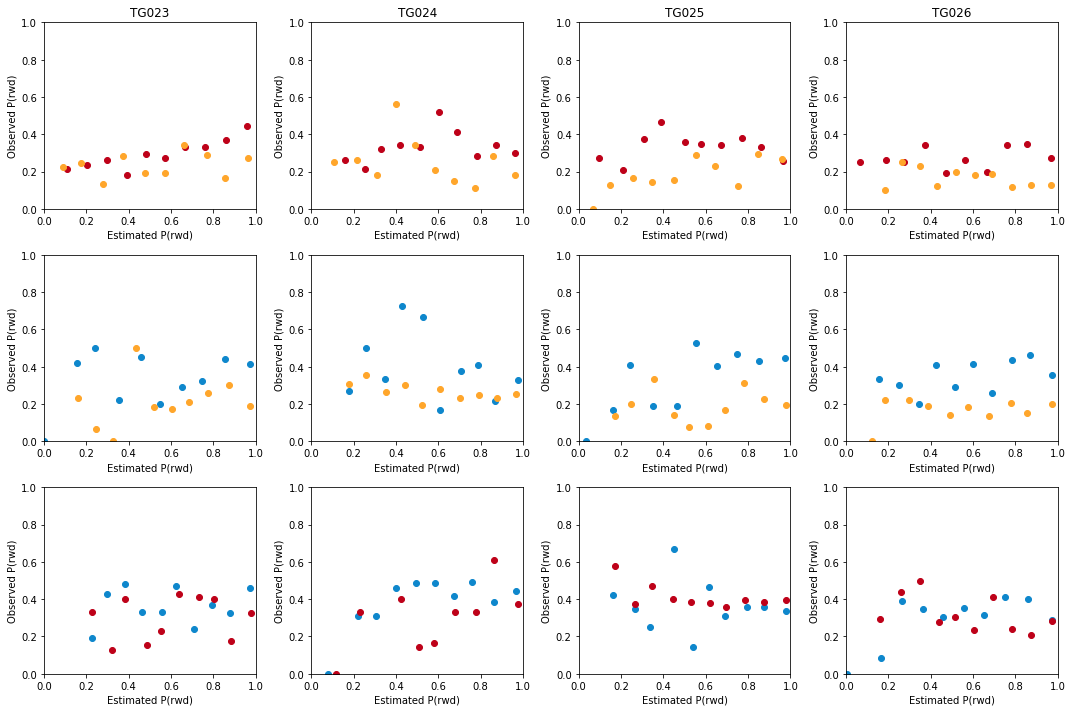

In [11]:
lambdas=[1./30,1./60,1./120]
hf, ha = plt.subplots(3,len(listSubj),figsize=(15,10))#,sharex=True,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfTince.subj==nameSubj
    ha[0,iSubj].set_title(nameSubj)
    for iArm in list(set(dfTince[ndxSubj].arm)):
        ndxArm=np.logical_and(dfTince.arm==iArm,ndxSubj)
        listArmJ=list(set(dfTince[ndxArm].nextArm))
        for jArm in listArmJ:
            ndxArmJ=np.logical_and(dfTince.nextArm==jArm,ndxArm)
            x=dfTince[ndxArmJ]['tinceR'+str(listArmJ[0])]+dfTince[ndxArmJ]['travel']
            y=dfTince[ndxArmJ]['nextRwded']
            
            x=1-np.exp(-1*lambdas[listArmJ[0]]*x)
            
            hist, bin_edges = np.histogram(x)
            ndx=np.digitize(x,bin_edges)
            x = [x[ndx == i].mean() for i in range(1, len(bin_edges))]
            y = [y[ndx == i].mean() for i in range(1, len(bin_edges))]
            
#             y=y.values[np.argsort(x.values)]
#             x=sorted(x)
            
            ha[iArm,iSubj].scatter(x,y,c=colors[jArm])
            ha[iArm,iSubj].set_xlabel('Estimated P(rwd)')
            ha[iArm,iSubj].set_ylabel('Observed P(rwd)')
            ha[iArm,iSubj].set_xlim(0,1)
            ha[iArm,iSubj].set_ylim(0,1)
            
plt.tight_layout()

**Figure 1.6** Sanity-check of P(rwd). Failed - datapoints should (by design) fall on unity line

In [12]:
with open('dfSanPr.pkl','rb') as fname:
    dfSanPr=pickle.load(fname)

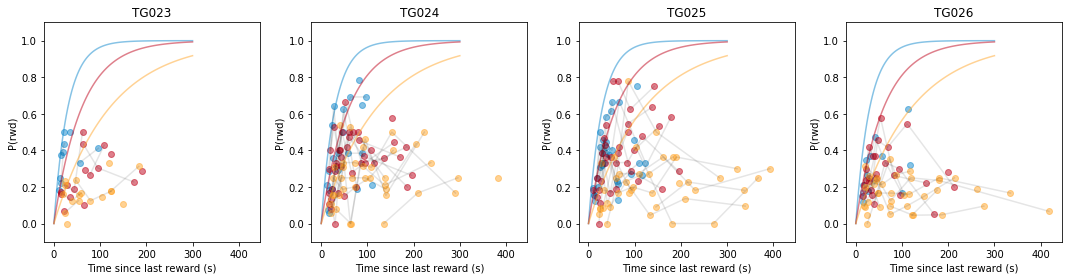

In [13]:
lambdas=[1./30,1./60,1./120]
hf, ha = plt.subplots(1,len(listSubj),figsize=(15,4),sharex=True)#,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfSanPr.subj==nameSubj
    ha[iSubj].set_title(nameSubj)
    for iArm in list(set(dfSanPr[ndxSubj].arm)):
        ndxArm=np.logical_and(dfSanPr.arm==iArm,ndxSubj)
        
        x=np.linspace(0,300,101)
        
        ha[iSubj].set_xlabel('Time since last reward (s)')
        ha[iSubj].set_ylabel('P(rwd)')
        ha[iSubj].set_ylim(-.1,1.1)
        
        y=1-np.exp(-lambdas[iArm]*x)
        ha[iSubj].plot(x,y,c=colors[iArm],alpha=.5)

        for iSess in list(set(dfSanPr[ndxSubj].date)):
            ndxSess=np.logical_and(dfSanPr.date==iSess,ndxArm)
            
            x=dfSanPr[ndxSess].tince.values
            y=dfSanPr[ndxSess].isRwded.values

#             bin_edges=np.percentile(x,np.linspace(0,100,np.floor(np.sqrt(len(x))).astype('int')))
            bin_edges=np.percentile(x,np.linspace(0,100,7))

            ndx=np.digitize(x,bin_edges)
            x_binned = [x[ndx == i].mean() for i in range(1, len(bin_edges))]
            y_binned = [y[ndx == i].mean() for i in range(1, len(bin_edges))]

            ha[iSubj].scatter(x_binned,y_binned,c=colors[iArm],alpha=.5)
            ha[iSubj].plot(x_binned,y_binned,c='xkcd:black',alpha=.1)
        
plt.tight_layout()

**Figure 1.7** Another failed sanity-check: $p(reward)$ as function of time since last reward at time of first poke of an arm visit. Colored lines are $F_{X_k}(t_k) = 1 - e^{-\lambda_k t_k}$
UPDATE: Bpod problem detected - poke responses incompatible with travel times, probably cross talk

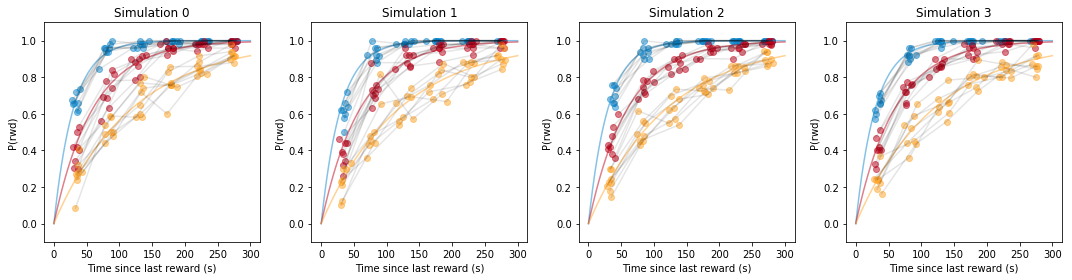

In [14]:
lambdas=[1./30,1./60,1./120]
hf, ha = plt.subplots(1,len(listSubj),figsize=(15,4),sharex=True)#,sharey=True)

for iSubj in range(len(listSubj)):
    ha[iSubj].set_title('Simulation ' + str(iSubj))
    for iArm in list(set(dfSanPr[ndxSubj].arm)):
        ndxArm=np.logical_and(dfSanPr.arm==iArm,ndxSubj)
        
        x=np.linspace(0,300,101)
        
        ha[iSubj].set_xlabel('Time since last reward (s)')
        ha[iSubj].set_ylabel('P(rwd)')
        ha[iSubj].set_ylim(-.1,1.1)
        
        y=1-np.exp(-lambdas[iArm]*x)
        ha[iSubj].plot(x,y,c=colors[iArm],alpha=.5)
        for iSess in list(set(dfSanPr[ndxSubj].date)):
            
            x=np.ceil(np.random.uniform(10,300,300))
            y=np.ceil(np.random.exponential(1/lambdas[iArm],300))
            y=[x[i]>y[i] for i in range(len(x))]
            y=np.array(y)

#             bin_edges=np.percentile(x,np.linspace(0,100,np.floor(np.sqrt(len(x))).astype('int')))
            bin_edges=np.percentile(x,np.linspace(0,100,7))

            ndx=np.digitize(x,bin_edges)
            x_binned = [x[ndx == i].mean() for i in range(1, len(bin_edges))]
            y_binned = [y[ndx == i].mean() for i in range(1, len(bin_edges))]
            
            ha[iSubj].scatter(x_binned,y_binned,c=colors[iArm],alpha=.5)
            ha[iSubj].plot(x_binned,y_binned,c='xkcd:black',alpha=.1)
        
plt.tight_layout()

**Figure 1.8** Simulation of expected result for previous figure

## 2. Diminishing Returns

In this variant, arms were visited in an experimenter-imposed sequence and rewards at a given arm were delivered in quick succession but with exponentially diminishing magnitude.

The first reward of each arm visit was always of $20 \mu L$. The next reward at the same arm was delivered immediately after the first poke-response after an inter-reward-interval (IRI) of 6s. The reward magnitude decayed exponentially for each consecutive reward at the same arm, going from the initial $20 \mu L$ to $2 \mu L$ in $\{3,6,12\}$ trials respectively for arms $\{0,1,2\}$.  While decay rate was fixed across sessions, animals were made to visit arms in a clockwise or counterclockwise manner, randomized and balanced across sessions. 

In [15]:
with open('dfDeplt.pkl','rb') as fname:
    dfDeplt=pickle.load(fname)
    
listSubj=np.array(list(set(dfDeplt.subj)))
listSubj.sort()

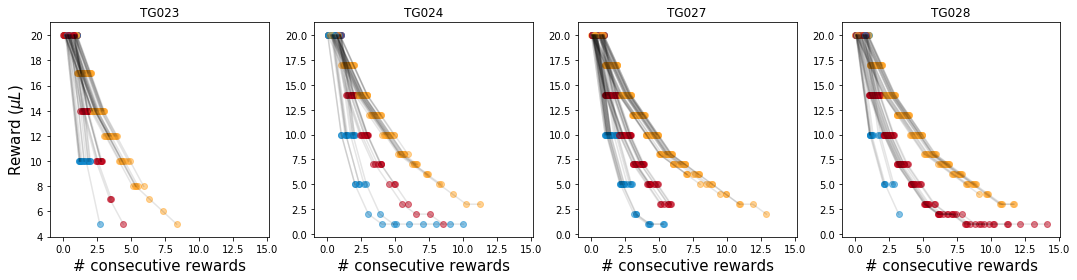

In [16]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(15,4),sharex=True)#,sharey=True)

setN=(3,6,12)

listTrials=np.random.permutation(np.arange(len(dfDeplt)))[0:500]
for iTrial in listTrials:
        
    iSubj=np.arange(4)[listSubj==dfDeplt.iloc[iTrial].subj].item()
    iArm=int(dfDeplt.iloc[iTrial].arm)
    x=np.arange(dfDeplt.iloc[iTrial].nRews)
    y=np.ceil(.1**(x/setN[iArm])*20)

    x=x+np.random.rand(1)

    ha[iSubj].scatter(x,y,c=colors[iArm],alpha=.5)
    ha[iSubj].plot(x,y,c='xkcd:black',alpha=.1)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]    
    ha[iSubj].set_title(nameSubj)
    if iSubj==0:
        ha[iSubj].set_ylabel("Reward ($\mu L$)",fontsize=15)
    ha[iSubj].set_xlabel("# consecutive rewards",fontsize=15)
        
plt.tight_layout()

**Figure 2.1** Single trial depiction of reward magnitude as a function of consecutive responding. n=500 randomly selected trials, split by subject (panels) and arms (colors). Jitter added to aid visualization.

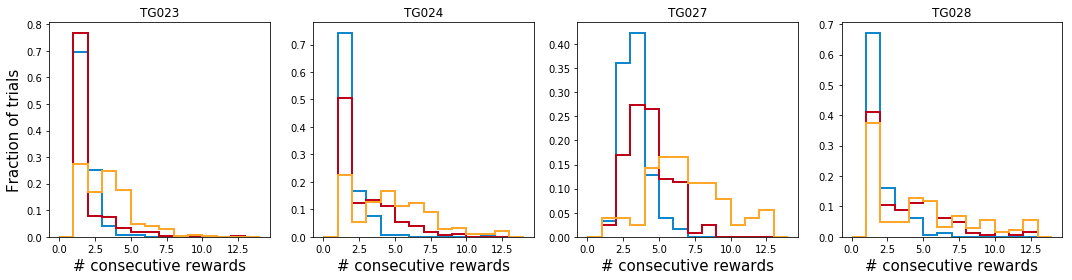

In [17]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(15,4),sharex=True)#,sharey=True)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfDeplt.subj==nameSubj
    for iArm in list(set(dfDeplt[ndxSubj].arm)):
        iArm=int(iArm)
        ndxArm=np.logical_and(dfDeplt.arm==iArm,ndxSubj)
            
        x=dfDeplt[ndxArm].nRews.values

        x=x.clip(1,12)
        ha[iSubj].hist(x,bins=np.arange(15),cumulative=False,density=True,histtype='step',color=colors[iArm],lw=2)
        
    ha[iSubj].set_title(nameSubj)
    if iSubj==0:
        ha[iSubj].set_ylabel("Fraction of trials",fontsize=15)
    ha[iSubj].set_xlabel("# consecutive rewards",fontsize=15)
        
plt.tight_layout()

**Figure 2.2** Normalized histogram of number of consecutive rewards obtained per arm visit.

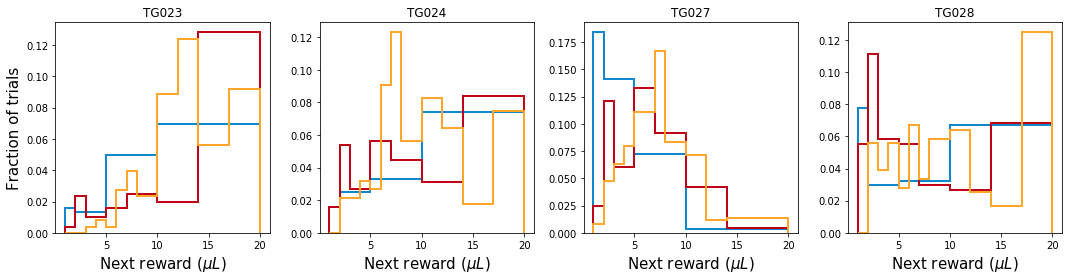

In [18]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(15,4),sharex=True)#,sharey=True)

setN=(3,6,12)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfDeplt.subj==nameSubj
    for iArm in list(set(dfDeplt[ndxSubj].arm)):
        iArm=int(iArm)
        ndxArm=np.logical_and(dfDeplt.arm==iArm,ndxSubj)
                    
        x=dfDeplt[ndxArm].nRews.values
        x2=np.ceil(.1**(x/setN[iArm])*20)

#         x=x.clip(1,12)
#,bins=np.arange(12)
        bins=np.unique(np.ceil(.1**(np.arange(20)/setN[iArm])*20))
        ha[iSubj].hist(x2,bins=bins,cumulative=False,density=True,histtype='step',color=colors[iArm],lw=2)
        
    ha[iSubj].set_title(nameSubj)
    if iSubj==0:
        ha[iSubj].set_ylabel("Fraction of trials",fontsize=15)
    ha[iSubj].set_xlabel("Next reward ($\mu L$)",fontsize=15)
        
plt.tight_layout()

**Figure 2.3** Normalized histograms of reward magnitude at time of disengaging from patch.

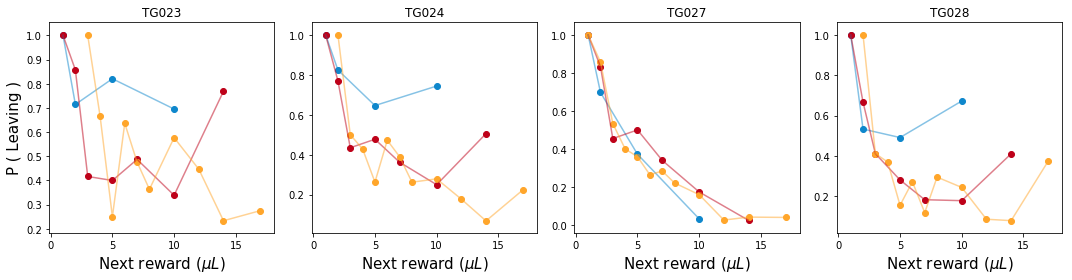

In [19]:
hf, ha = plt.subplots(1,len(listSubj),figsize=(15,4),sharex=True)#,sharey=True)

setN=(3,6,12)

for iSubj in range(len(listSubj)):
    nameSubj=listSubj[iSubj]
    ndxSubj=dfDeplt.subj==nameSubj
    
# for iTrial in range(len(dfDeplt)):#100):#

    for iArm in list(set(dfDeplt[ndxSubj].arm)):
        iArm=int(iArm)
        ndxArm=np.logical_and(dfDeplt.arm==iArm,ndxSubj)
        
        dfArm=dfDeplt[ndxArm]
        
        dfNextRwd=np.ceil(.1**(dfArm.nRews/setN[iArm])*20).values.astype(int)
        listNextRew=np.unique(dfNextRwd)
        y=np.full(listNextRew.shape,np.nan)
        for iRew in range(len(listNextRew)):
            y[iRew]=np.sum(dfNextRwd==listNextRew[iRew])/np.sum(dfNextRwd<=listNextRew[iRew])
            
        ha[iSubj].scatter(listNextRew,y,c=colors[iArm])
        ha[iSubj].plot(listNextRew,y,c=colors[iArm],alpha=.5)
#         break
        
#     break

    ha[iSubj].set_title(nameSubj)
    if iSubj==0:
        ha[iSubj].set_ylabel("P ( Leaving )",fontsize=15)
    ha[iSubj].set_xlabel("Next reward ($\mu L$)",fontsize=15)
    
plt.tight_layout()

**Figure 2.4** Probability of disengaging from patch as function of magnitude of next reward.